# Transforming Data Using a Function or Mapping

In [1]:
import pandas as pd

In [7]:
df = pd.DataFrame(
	[('carrot', 'red', 1),
	('papaya', 'yellow', 0),
	('mango', 'yellow', 0),
	('apple', 'red', 0)
	],
	columns=['species', 'color', 'type']
)
print("Dataframe before Mapping: ")
df

Dataframe before Mapping: 


,species,color,type
0,carrot,red,1
1,papaya,yellow,0
2,mango,yellow,0
3,apple,red,0


In [8]:
mappings = {
            	'carrot': 'veg',
            	'papaya': 'fruit'
}

In [9]:
df['food_type'] = df['species'].map(mappings)
print("Dataframe after Mapping: ")
df

Dataframe after Mapping: 


,species,color,type,food_type
0,carrot,red,1,veg
1,papaya,yellow,0,fruit
2,mango,yellow,0,NaN
3,apple,red,0,NaN


In [10]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon','Pastrami', 'corned beef', 'Bacon','pastrami', 'honey ham', 'nova lox'],'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

In [11]:
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [12]:
meat_to_animal = {
            'bacon': 'pig',
            'pulled pork': 'pig',
            'pastrami': 'cow',
            'corned beef': 'cow',
            'honey ham': 'pig',
            'nova lox': 'salmon'
}

In [13]:
data['meat_source'] = data.food.str.lower().map(meat_to_animal)

In [14]:
data

,food,ounces,meat_source
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


# Discretization and Binning

In [2]:
df = pd.read_csv("/content/weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [5]:
df.Gender.replace(['Male', 'Female'], [1,0], inplace=True)

<ipython-input-5-d1162b4d3cb4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Gender.replace(['Male', 'Female'], [1,0], inplace=True)


In [6]:
df.Gender.unique()

array([1, 0])

In [ ]:
df.Height.describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [ ]:
df.Height.min(), df.Height.max()

(54.26313333, 78.99874235)

In [ ]:
bins = [50,55,60,65,70,75,80]

In [ ]:
cats = pd.cut(df.Height, bins)

In [ ]:
cats

,Height
0,"(70, 75]"
1,"(65, 70]"
2,"(70, 75]"
3,"(70, 75]"
4,"(65, 70]"
...,...
9995,"(65, 70]"
9996,"(65, 70]"
9997,"(60, 65]"
9998,"(65, 70]"


In [ ]:
cats.cat.categories

IntervalIndex([(50, 55], (55, 60], (60, 65], (65, 70], (70, 75], (75, 80]], dtype='interval[int64, right]')

In [ ]:
cats.cat.codes

,0
0,4
1,3
2,4
3,4
4,3
...,...
9995,3
9996,3
9997,2
9998,3


In [ ]:
frequency = pd.value_counts(cats)
frequency

<ipython-input-51-d69d4dd276bc>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequency = pd.value_counts(cats)


,count
Height,
"(65, 70]",4312
"(60, 65]",3397
"(70, 75]",1793
"(55, 60]",410
"(75, 80]",85
"(50, 55]",3


In [ ]:
frequency.index

CategoricalIndex([(65, 70], (60, 65], (70, 75], (55, 60], (75, 80], (50, 55]], categories=[(50, 55], (55, 60], (60, 65], (65, 70], (70, 75], (75, 80]], ordered=True, dtype='category', name='Height')

In [ ]:
frequency.index =["(65, 70]", "(60, 65]","(70, 75]","(55, 60]","(75, 80]","(50, 55]"]

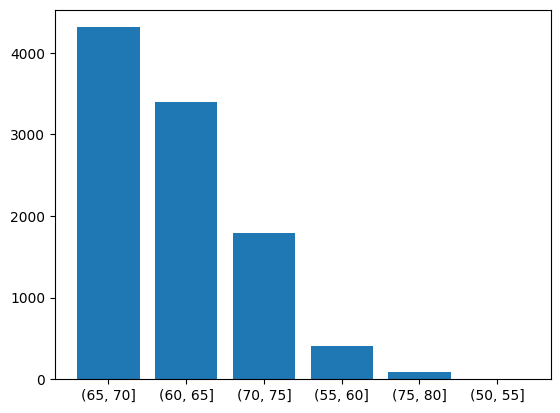

In [ ]:
import matplotlib.pyplot as plt
plt.bar(x=frequency.index, height=frequency.values)
plt.show()

In [ ]:
df.Weight.describe()

,Weight
count,10000.000000
mean,161.440357
std,32.108439
min,64.700127
25%,135.818051
50%,161.212928
75%,187.169525
max,269.989698


In [ ]:
df.Weight.min(), df.Weight.max()

(64.70012671, 269.9896985)

In [ ]:
bins = [50,100,150,200,250,300]

In [ ]:
cats = pd.cut(df.Weight, bins)

In [ ]:
cats

,Weight
0,"(200, 250]"
1,"(150, 200]"
2,"(200, 250]"
3,"(200, 250]"
4,"(200, 250]"
...,...
9995,"(100, 150]"
9996,"(150, 200]"
9997,"(100, 150]"
9998,"(150, 200]"


In [ ]:
cats.cat.categories

IntervalIndex([(50, 100], (100, 150], (150, 200], (200, 250], (250, 300]], dtype='interval[int64, right]')

In [ ]:
cats.cat.codes

,0
0,3
1,2
2,3
3,3
4,3
...,...
9995,1
9996,2
9997,1
9998,2


In [ ]:
frequency = pd.value_counts(cats)
frequency

<ipython-input-63-d69d4dd276bc>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequency = pd.value_counts(cats)


,count
Weight,
"(150, 200]",4717
"(100, 150]",3857
"(200, 250]",1272
"(50, 100]",146
"(250, 300]",8


In [ ]:
frequency.index

CategoricalIndex([(150, 200], (100, 150], (200, 250], (50, 100], (250, 300]], categories=[(50, 100], (100, 150], (150, 200], (200, 250], (250, 300]], ordered=True, dtype='category', name='Weight')

In [ ]:
frequency.index = ["(150, 200]", "(100, 150]", "(200, 250]", "(50, 100]", "(250, 300]"]

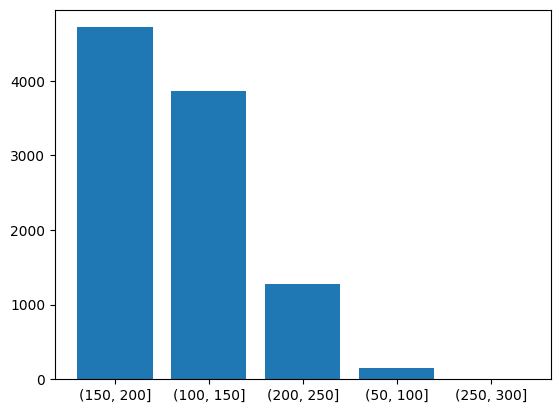

In [ ]:
import matplotlib.pyplot as plt
plt.bar(x=frequency.index, height=frequency.values)
plt.show()

# Computing Indicator/Dummy Variables

In [15]:
data

,food,ounces,meat_source
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [16]:
data.food = data.food.str.lower()

In [17]:
data.food.unique()

array(['bacon', 'pulled pork', 'pastrami', 'corned beef', 'honey ham',
       'nova lox'], dtype=object)

In [18]:
data.food.replace(['bacon', 'pulled pork', 'pastrami', 'corned beef', 'honey ham',
       'nova lox'], [1,2,3,4,5,6])

<ipython-input-18-8bc8ece92680>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.food.replace(['bacon', 'pulled pork', 'pastrami', 'corned beef', 'honey ham',


,food
0,1
1,2
2,1
3,3
4,4
5,1
6,3
7,5
8,6


In [19]:
pd.get_dummies(data)

,ounces,food_bacon,food_corned beef,food_honey ham,food_nova lox,food_pastrami,food_pulled pork,meat_source_cow,meat_source_pig,meat_source_salmon
0,4.0,True,False,False,False,False,False,False,True,False
1,3.0,False,False,False,False,False,True,False,True,False
2,12.0,True,False,False,False,False,False,False,True,False
3,6.0,False,False,False,False,True,False,True,False,False
4,7.5,False,True,False,False,False,False,True,False,False
5,8.0,True,False,False,False,False,False,False,True,False
6,3.0,False,False,False,False,True,False,True,False,False
7,5.0,False,False,True,False,False,False,False,True,False
8,6.0,False,False,False,True,False,False,False,False,True


In [20]:
pd.get_dummies(data, dtype=int)

,ounces,food_bacon,food_corned beef,food_honey ham,food_nova lox,food_pastrami,food_pulled pork,meat_source_cow,meat_source_pig,meat_source_salmon
0,4.0,1,0,0,0,0,0,0,1,0
1,3.0,0,0,0,0,0,1,0,1,0
2,12.0,1,0,0,0,0,0,0,1,0
3,6.0,0,0,0,0,1,0,1,0,0
4,7.5,0,1,0,0,0,0,1,0,0
5,8.0,1,0,0,0,0,0,0,1,0
6,3.0,0,0,0,0,1,0,1,0,0
7,5.0,0,0,1,0,0,0,0,1,0
8,6.0,0,0,0,1,0,0,0,0,1
